In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

                    CURRENT PERFORMANCE  CURRENT RUNTIME CORRELATION METHOD
CORRELATION METHOD                                                         
Pearson                       90.988380         7.500666            Pearson
Spearman                      91.307031         6.210455           Spearman
SU                            91.060905        16.785585                 SU
IG                            91.261127        13.504162                 IG
Relief                        91.449948         7.060981             Relief


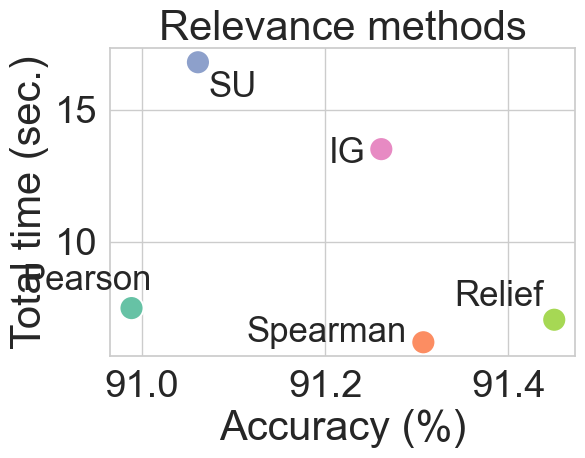

In [7]:
plt.subplots(figsize=(6, 4))

sns.set(font_scale=2.5, style="whitegrid")
runtime = pd.read_csv('../../autofeat_results/all_results.csv')
# runtime['time'] = runtime['time'].apply(lambda x: np.log(x))
runtime = runtime.loc[-runtime['DATASET NAME'].isin(['HousingPrices', 'TOPO', 'QSAR'])]
runtime["CURRENT PERFORMANCE"] = pd.to_numeric(runtime["CURRENT PERFORMANCE"])

a = runtime[['CURRENT PERFORMANCE', "CORRELATION METHOD"]].groupby("CORRELATION METHOD").mean()
b = runtime[['CURRENT RUNTIME', "CORRELATION METHOD"]].groupby("CORRELATION METHOD").mean()

a["CURRENT PERFORMANCE"] = a["CURRENT PERFORMANCE"].multiply(100)
# b["CURRENT RUNTIME"] = b["CURRENT RUNTIME"].multiply(1000)

a = pd.concat([a, b], axis=1)
a = a.reindex(['Pearson', 'Spearman', 'SU', 'IG', 'Relief'])
a['CORRELATION METHOD'] = ['Pearson', 'Spearman', 'SU', 'IG', 'Relief']

print(a)

# sns.color_palette("husl", 8)
g = sns.scatterplot(
    data=a,
    x="CURRENT PERFORMANCE", y="CURRENT RUNTIME", hue='CORRELATION METHOD',
    s=300, palette="Set2"
)
# sns.color_palette("husl", 8)

for i, row in a[a['CORRELATION METHOD'].isin(['Pearson'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-32,13), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['Spearman'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-70,0), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['Relief'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-40,10), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['SU'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(25,-25), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['IG'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-25,-10), ha='center', fontsize=25)

g.set_ylabel('Total time (sec.)') #labelpad=60)
g.set_xlabel('Accuracy (%)')

plt.legend([],[], frameon=False)

plt.title('Relevance methods')
plt.savefig('relevance_methods_performance.pdf', dpi=1200, bbox_inches="tight")

                    CURRENT PERFORMANCE  CURRENT RUNTIME CORRELATION METHOD
CORRELATION METHOD                                                         
Pearson                       91.532458      6875.872758            Pearson
Spearman                      91.506831      6218.588694           Spearman
SU                            90.961005     16792.949281                 SU
IG                            91.186202     13540.462407                 IG
Relief                        91.075323      7076.260442             Relief


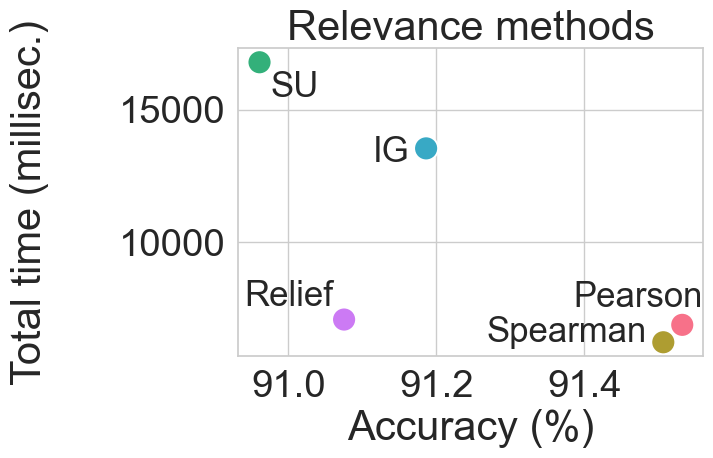

In [14]:
plt.subplots(figsize=(6, 4))

sns.set(font_scale=2.5, style="whitegrid")
runtime = pd.read_csv('../../autofeat_results_GOOD/all_results_accuracy.csv')
# runtime['time'] = runtime['time'].apply(lambda x: np.log(x))
runtime = runtime.loc[-runtime['DATASET NAME'].isin(['HousingPrices', 'TOPO', 'QSAR'])]
runtime["CURRENT PERFORMANCE"] = pd.to_numeric(runtime["CURRENT PERFORMANCE"])

a = runtime[['CURRENT PERFORMANCE', "CORRELATION METHOD"]].groupby("CORRELATION METHOD").mean()
b = runtime[['CURRENT RUNTIME', "CORRELATION METHOD"]].groupby("CORRELATION METHOD").mean()

a["CURRENT PERFORMANCE"] = a["CURRENT PERFORMANCE"].multiply(100)
b["CURRENT RUNTIME"] = b["CURRENT RUNTIME"].multiply(1000)

a = pd.concat([a, b], axis=1)
a = a.reindex(['Pearson', 'Spearman', 'SU', 'IG', 'Relief'])
a['CORRELATION METHOD'] = ['Pearson', 'Spearman', 'SU', 'IG', 'Relief']

print(a)

# sns.color_palette("husl", 8)
g = sns.scatterplot(
    data=a,
    x="CURRENT PERFORMANCE", y="CURRENT RUNTIME", hue='CORRELATION METHOD',
    s=300, palette="husl"
)

for i, row in a[a['CORRELATION METHOD'].isin(['Pearson'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-32,13), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['Spearman'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-70,0), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['Relief'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-40,10), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['SU'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(25,-25), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['IG'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-25,-10), ha='center', fontsize=25)

g.set_ylabel('Total time (millisec.)')
g.set_xlabel('Accuracy (%)')

plt.legend([],[], frameon=False)

plt.title('Relevance methods')
plt.savefig('relevance_methods_performance.pdf', dpi=1200,bbox_inches="tight")